<a href="https://colab.research.google.com/github/Polozov2005/CFR_Lab3/blob/main/CFR_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
# 1. Подключение Pandas
import pandas as pd

In [96]:
# 2. Web-scraping таблицы с данными
url = 'https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D0%BF%D0%BB%D0%BE%D0%B2%D0%B0%D1%8F_%D1%8D%D0%BD%D0%B5%D1%80%D0%B3%D0%B5%D1%82%D0%B8%D0%BA%D0%B0_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8'

# аргумент match - регулярное выражение, по которому выбирается таблица
data = pd.read_html(url, match = 'ГРЭС')

# преобразование данных в Data Frame
df = data[0]
df = df.set_index('№')

In [97]:
# 3. Выравнивание текста по центру
def center_align(df):
  df_style = df.style.set_properties(**{'text-align': 'center'})
  df_style = df_style.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
  return df_style

center_align(df)

,Название ТЭС,"Установленная мощность, МВт",топливо,Годы ввода агрегатов,Собственник,Регион
№,,,,,,
1,Сургутская ГРЭС-2,56871,"попутный нефтяной газ, природный газ",1985—2011,Юнипро,Ханты-Мансийский АО
2,Рефтинская ГРЭС,3800,каменный уголь,1970—1980,Кузбассэнерго,Свердловская область
3,Костромская ГРЭС,3660,природный газ,1969—1980,Интер РАО,Костромская область
4,Пермская ГРЭС,3363,природный газ,1986—2017,Интер РАО,Пермский край
5,Сургутская ГРЭС-1,3333,"попутный нефтяной газ, природный газ",1972—1983,ОГК-2,Ханты-Мансийский АО
6,Рязанская ГРЭС,3130,"бурый уголь, каменный уголь, природный газ",1973—2016,Интер РАО,Рязанская область
7,Киришская ГРЭС,2595,природный газ,1969—2012,ОГК-2,Ленинградская область
8,Конаковская ГРЭС,2520,природный газ,1964—1968,Энел Россия,Тверская область
9,Ириклинская ГРЭС,2430,природный газ,1970—1979,Интер РАО,Оренбургская область


In [98]:
# 4. Сортировка данных
df_sorted = df.sort_values(['Название ТЭС'])

center_align(df_sorted)

,Название ТЭС,"Установленная мощность, МВт",топливо,Годы ввода агрегатов,Собственник,Регион
№,,,,,,
11,Берёзовская ГРЭС,2400,бурый уголь,1987—2015,Юнипро,Красноярский край
13,Заинская ГРЭС,22049,природный газ,1963—1972,Татэнерго,Татарстан
9,Ириклинская ГРЭС,2430,природный газ,1970—1979,Интер РАО,Оренбургская область
7,Киришская ГРЭС,2595,природный газ,1969—2012,ОГК-2,Ленинградская область
8,Конаковская ГРЭС,2520,природный газ,1964—1968,Энел Россия,Тверская область
3,Костромская ГРЭС,3660,природный газ,1969—1980,Интер РАО,Костромская область
14,Нижневартовская ГРЭС,2031,попутный нефтяной газ,1993—2014,Интер РАО,Ханты-Мансийский АО
12,Новочеркасская ГРЭС,2258,"каменный уголь, природный газ",1965—2016,ОГК-2,Ростовская область
4,Пермская ГРЭС,3363,природный газ,1986—2017,Интер РАО,Пермский край


In [99]:
# 5. Добавление к таблице столбца с новыми данными, полученными путём преобразования имеющихся
df_exted = df.copy()

df_exted['Вычисление'] = df_exted['Установленная мощность, МВт'] / 2

center_align(df_exted)

,Название ТЭС,"Установленная мощность, МВт",топливо,Годы ввода агрегатов,Собственник,Регион,Вычисление
№,,,,,,,
1,Сургутская ГРЭС-2,56871,"попутный нефтяной газ, природный газ",1985—2011,Юнипро,Ханты-Мансийский АО,28435.500000
2,Рефтинская ГРЭС,3800,каменный уголь,1970—1980,Кузбассэнерго,Свердловская область,1900.000000
3,Костромская ГРЭС,3660,природный газ,1969—1980,Интер РАО,Костромская область,1830.000000
4,Пермская ГРЭС,3363,природный газ,1986—2017,Интер РАО,Пермский край,1681.500000
5,Сургутская ГРЭС-1,3333,"попутный нефтяной газ, природный газ",1972—1983,ОГК-2,Ханты-Мансийский АО,1666.500000
6,Рязанская ГРЭС,3130,"бурый уголь, каменный уголь, природный газ",1973—2016,Интер РАО,Рязанская область,1565.000000
7,Киришская ГРЭС,2595,природный газ,1969—2012,ОГК-2,Ленинградская область,1297.500000
8,Конаковская ГРЭС,2520,природный газ,1964—1968,Энел Россия,Тверская область,1260.000000
9,Ириклинская ГРЭС,2430,природный газ,1970—1979,Интер РАО,Оренбургская область,1215.000000


In [100]:
# 6. Выбор фрагмента таблицы по условию
# Выбрать электростанции с мощностью выше 3000 МВт
center_align(df[df['Установленная мощность, МВт'] > 3000])

,Название ТЭС,"Установленная мощность, МВт",топливо,Годы ввода агрегатов,Собственник,Регион
№,,,,,,
1,Сургутская ГРЭС-2,56871,"попутный нефтяной газ, природный газ",1985—2011,Юнипро,Ханты-Мансийский АО
2,Рефтинская ГРЭС,3800,каменный уголь,1970—1980,Кузбассэнерго,Свердловская область
3,Костромская ГРЭС,3660,природный газ,1969—1980,Интер РАО,Костромская область
4,Пермская ГРЭС,3363,природный газ,1986—2017,Интер РАО,Пермский край
5,Сургутская ГРЭС-1,3333,"попутный нефтяной газ, природный газ",1972—1983,ОГК-2,Ханты-Мансийский АО
6,Рязанская ГРЭС,3130,"бурый уголь, каменный уголь, природный газ",1973—2016,Интер РАО,Рязанская область
13,Заинская ГРЭС,22049,природный газ,1963—1972,Татэнерго,Татарстан


In [101]:
# 7. Выбор фрагмента таблицы по номерам строк и столбцов
center_align(df.iloc[1:14, 0:2])

,Название ТЭС,"Установленная мощность, МВт"
№,,
2,Рефтинская ГРЭС,3800
3,Костромская ГРЭС,3660
4,Пермская ГРЭС,3363
5,Сургутская ГРЭС-1,3333
6,Рязанская ГРЭС,3130
7,Киришская ГРЭС,2595
8,Конаковская ГРЭС,2520
9,Ириклинская ГРЭС,2430
10,Ставропольская ГРЭС,2423


In [102]:
# 8. Расчёты статистических показателей по сгруппированным данным
df.groupby(['топливо'])['Установленная мощность, МВт'].sum()

топливо
бурый уголь                                    2400
бурый уголь, каменный уголь, природный газ     3130
каменный уголь                                 3800
каменный уголь, природный газ                  2258
попутный нефтяной газ                          2031
попутный нефтяной газ, природный газ          60204
природный газ                                 39040
Name: Установленная мощность, МВт, dtype: int64

<Axes: ylabel='№'>

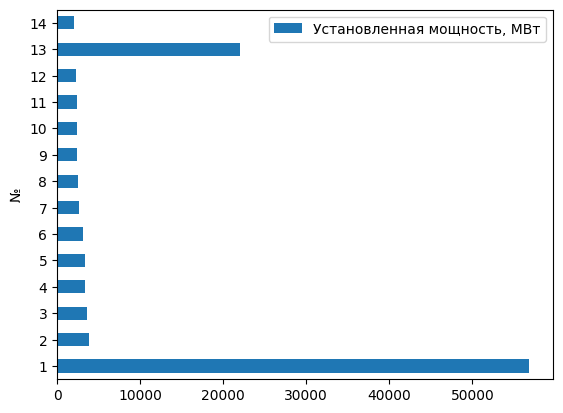

In [103]:
# 9. Построение гистограммы по данным
df.plot(kind = 'barh')

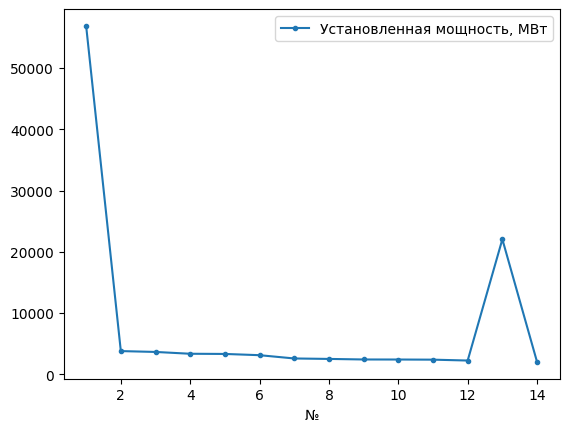

In [104]:
# 10. Построение интерактивного графика по данным
import matplotlib.pyplot as plt

axes = df.plot(marker='.', subplots = True)